In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
train = '../Houses/train.csv'

In [3]:
pd.options.display.max_columns=None
df_t = pd.read_csv(train)
df_t.shape

(1460, 81)

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
(df_t['Street'] != 'Grvl').sum()

1454

In [6]:
df_t1 = df_t.drop(['Id','Street','Fence', 'LotFrontage', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'Alley'],axis=1)

### Searching for right predictors

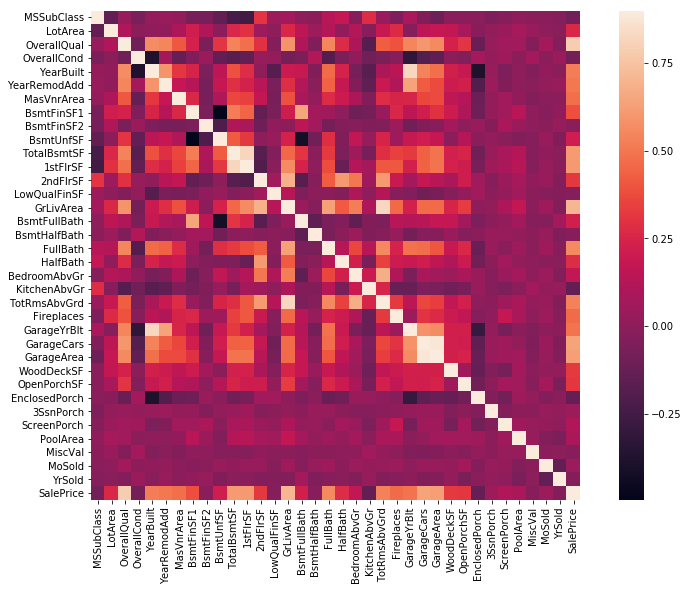

In [7]:
df_t1_corr = df_t1.corr()
plt.subplots(figsize=(14,9))
sns.heatmap(df_t1_corr, vmax=0.9, square=True)

In [8]:
df_faq = df_t1_corr[df_t1_corr['SalePrice'] > 0.3]
df_faq1 = df_faq[['SalePrice']]
df_faq1.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [9]:
df_faq2 = df_t[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
df_faq2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1452 non-null float64
BsmtFinSF1      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1379 non-null float64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
WoodDeckSF      1460 non-null int64
OpenPorchSF     1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(2), int64(16)
memory usage: 205.4 KB


In [10]:
df_faq2['MasVnrArea'].median()

0.0

In [11]:
df_faq2['MasVnrArea'] = df_faq2['MasVnrArea'].fillna(0.0)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_faq2['GarageYrBlt'].median()

1980.0

In [13]:
df_faq2['GarageYrBlt'] = df_faq2['GarageYrBlt'].fillna(1980.0)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
def Selling(sale):
    if sale == 'WD':
        return 1
    elif sale == 'CWD':
        return 2
    elif sale == 'VWD':
        return 3
    elif sale == 'New':
        return 4
    elif sale == 'COD':
        return 5
    elif sale == 'Con':
        return 6
    elif sale == 'ConLw':
        return 7
    elif sale == 'ConLI':
        return 8
    elif sale == 'ConLD':
        return 9
    elif sale == 'Oth':
        return 10
    else:
        return 0
    
Selling('WD')

1

In [15]:
df_t1['SaleTypes'] = df_t1['SaleType'].apply(Selling) 

In [16]:
df_plots14 = df_t1[['SaleTypes', 'SalePrice']]
df_plots14.corr()

,SaleTypes,SalePrice
SaleTypes,1.000000,0.150948
SalePrice,0.150948,1.000000


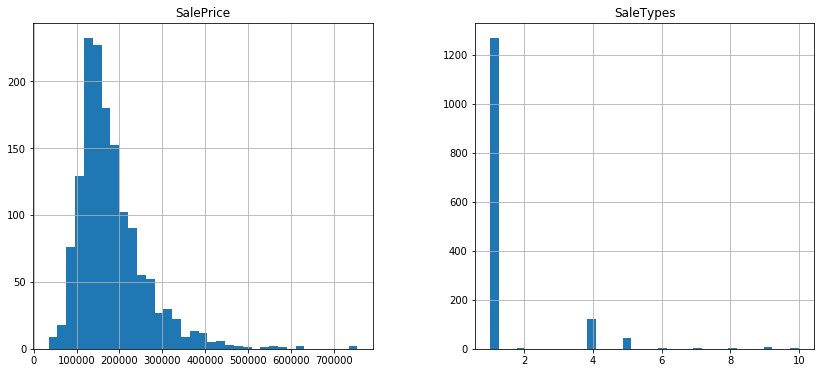

In [17]:
df_plots14.hist(figsize=(14,6), bins=35);

In [18]:
def Garage(types):
    if types == '2Types':
        return 1
    elif types == 'Attchd':
        return 2
    elif types == 'Basment':
        return 3
    elif types == 'BuiltIn':
        return 4
    elif types == 'CarPort':
        return 5
    elif types == 'Detchd':
        return 6
    else:
        return 0
    
Garage('NAs')

0

In [19]:
df_t1['GarageTypes'] = df_t1['GarageType'].apply(Garage)

In [20]:
df_t1['GarageTypes'] = df_t1['GarageTypes'].replace(0,2)

In [21]:
(df_t1['GarageTypes'] == 0).sum()

0

In [22]:
df_plots13 = df_t1[['GarageTypes', 'SalePrice']]

In [23]:
df_plots13.corr()

,GarageTypes,SalePrice
GarageTypes,1.000000,-0.302105
SalePrice,-0.302105,1.000000


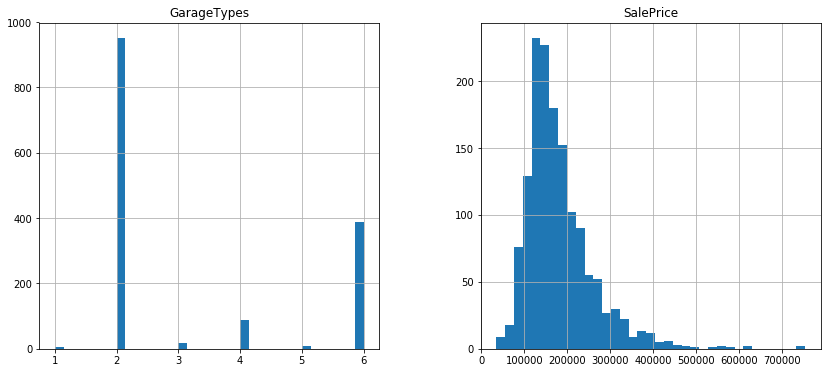

In [24]:
df_plots13.hist(figsize=(14,6), bins=35);

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


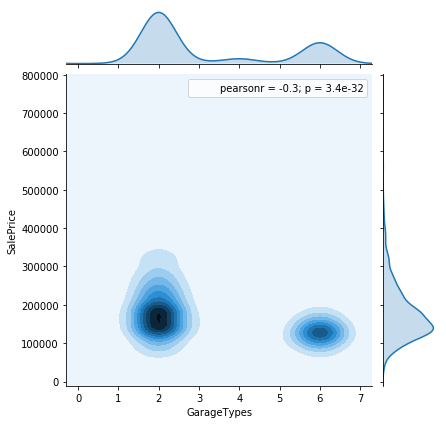

In [25]:
sns.jointplot(df_plots13['GarageTypes'], df_plots13['SalePrice'],kind='kde');

In [26]:
def Air(central):
    if central == 'Y':
        return 1
    elif central == 'N':
        return 2
    else:
        return 0
    
Air('Yes')

0

In [27]:
df_t1['CentralAirs'] = df_t1['CentralAir'].apply(Air)

In [28]:
df_plots10 = df_t1[['CentralAirs', 'SalePrice']]
df_plots10.corr()

,CentralAirs,SalePrice
CentralAirs,1.000000,-0.251328
SalePrice,-0.251328,1.000000


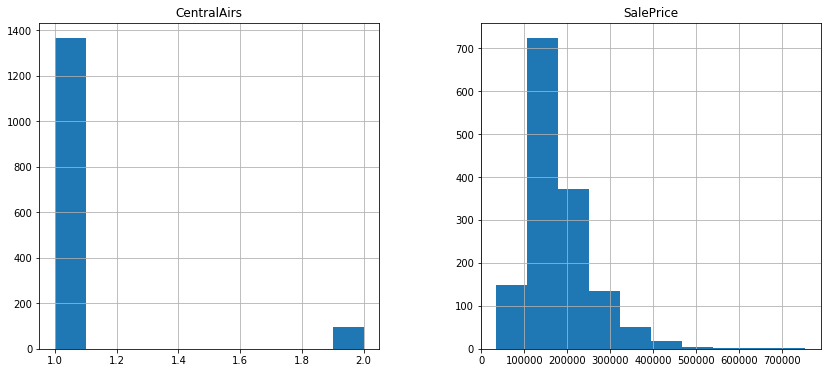

In [29]:
df_plots10.hist(figsize=(14,6), bins=10);

In [30]:
def electric(elec):
    if elec == 'SBrkr':
        return 1
    elif elec == 'FuseA':
        return 2
    elif elec == 'FuseF':
        return 3
    elif elec == 'FuseP':
        return 4
    elif elec == 'Mix':
        return 5
    else:
        return 0
electric('FuseAs')

0

In [31]:
df_t1['Electricals'] = df_t1['Electrical'].apply(electric)

In [32]:
df_t1['Electricals'] = df_t1['Electricals'].replace(0,1)

In [33]:
df_plots11 = df_t1[['Electricals', 'SalePrice']]

In [34]:
df_plots11.corr()

,Electricals,SalePrice
Electricals,1.000000,-0.233549
SalePrice,-0.233549,1.000000


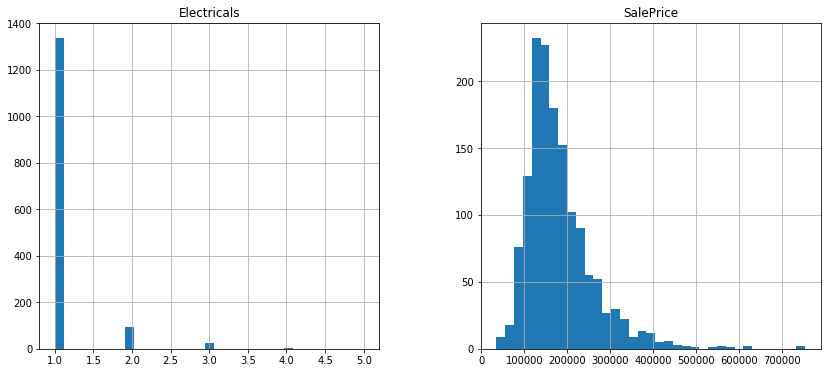

In [35]:
df_plots11.hist(figsize=(14,6), bins=35);

In [36]:
def heating(heat):
    if heat == 'Floor':
        return 1
    elif heat == 'GasA':
        return 2
    elif heat == 'GasW':
        return 3
    elif heat == 'Grav':
        return 4
    elif heat == 'OthW':
        return 5
    elif heat == 'Wall':
        return 6
    else:
        return 0
    
heating('Floors')

0

In [37]:
df_t1['Heatings'] = df_t1['Heating'].apply(heating)

In [38]:
df_plots12 = df_t1[['Heatings', 'SalePrice']]

In [39]:
df_plots12.corr()

,Heatings,SalePrice
Heatings,1.000000,-0.098812
SalePrice,-0.098812,1.000000


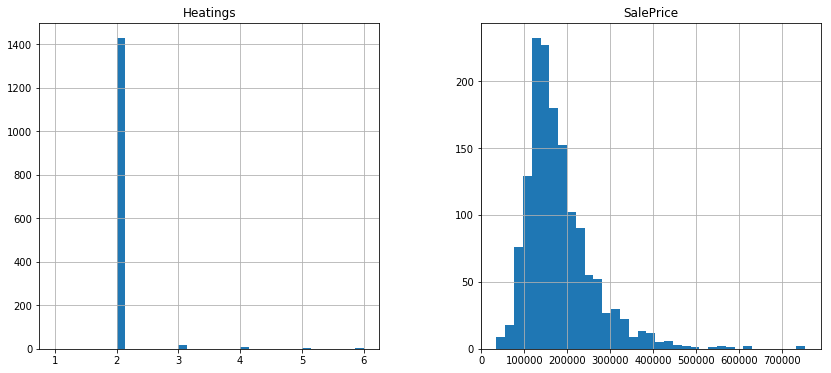

In [40]:
df_plots12.hist(figsize=(14,6), bins=35);

In [41]:
df_faq2.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [42]:
def founda(tipo):
    if tipo == 'BrkTil':
        return 1
    elif tipo == 'CBlock':
        return 2
    elif tipo == 'PConc':
        return 3
    elif tipo == 'Slab':
        return 4
    elif tipo == 'Stone':
        return 5
    elif tipo == 'Wood':
        return 6
    else:
        return 0
founda('CBlocks')

0

In [43]:
df_t1['Foundations'] = df_t1['Foundation'].apply(founda)

In [44]:
df_plots9 = df_t1[['Foundations', 'SalePrice']]

In [45]:
df_plots9.corr()

,Foundations,SalePrice
Foundations,1.000000,0.382479
SalePrice,0.382479,1.000000


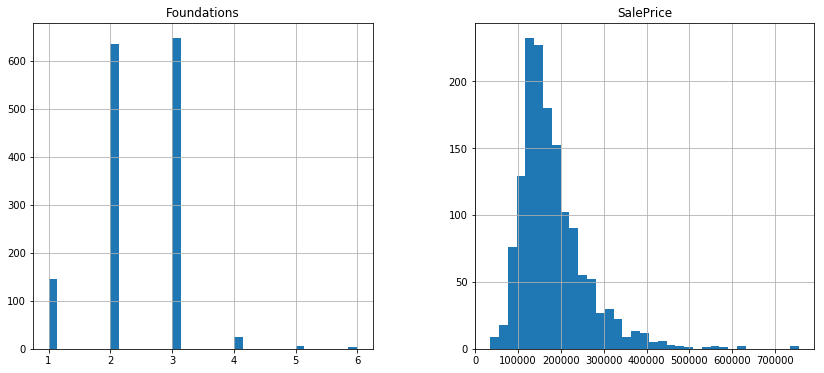

In [46]:
df_plots9.hist(figsize=(14,6), bins=35);

In [47]:
df_plots = df_t[['YearBuilt', 'SalePrice']]

In [48]:
df_plots.head()

,YearBuilt,SalePrice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000


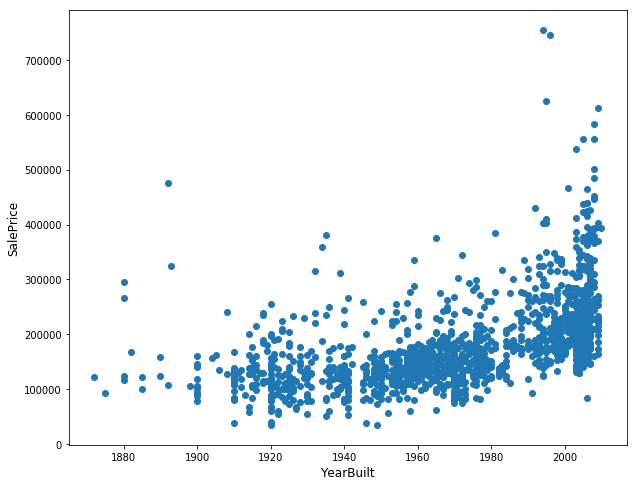

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(df_plots['YearBuilt'], df_plots['SalePrice'])
plt.xlabel('YearBuilt', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

In [50]:
df_plots.describe()

,YearBuilt,SalePrice
count,1460.000000,1460.000000
mean,1971.267808,180921.195890
std,30.202904,79442.502883
min,1872.000000,34900.000000
25%,1954.000000,129975.000000
50%,1973.000000,163000.000000
75%,2000.000000,214000.000000
max,2010.000000,755000.000000


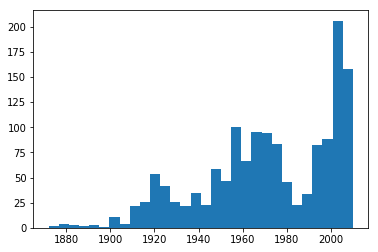

In [51]:
plt.hist(df_plots['YearBuilt'],bins=30);

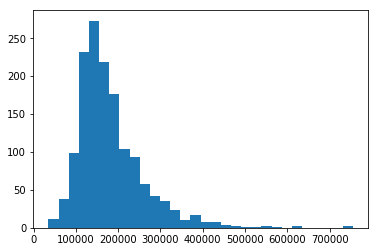

In [52]:
plt.hist(df_plots['SalePrice'], bins=30);

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


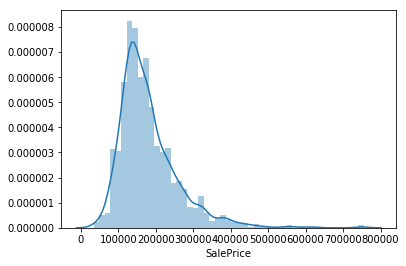

In [53]:
sns.distplot(df_plots['SalePrice'])

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


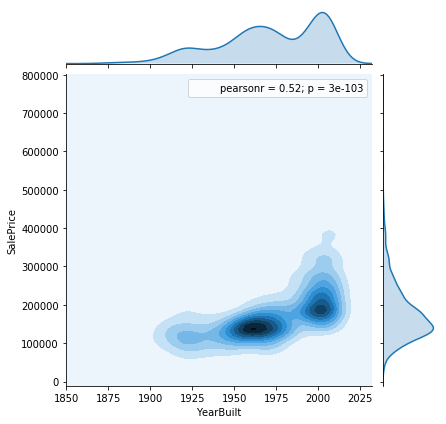

In [54]:
sns.jointplot(df_plots['YearBuilt'], df_plots['SalePrice'], kind='kde')

In [55]:
df_plots.corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


#### Year of Built

In [56]:
df_plots1 = df_t1[['LotArea', 'SalePrice']]

In [57]:
df_plots1.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [58]:
df_plots1.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


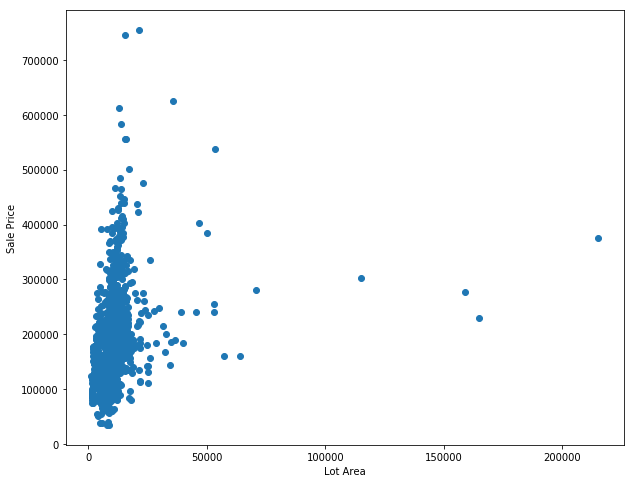

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(df_plots1['LotArea'], df_plots1['SalePrice'],data=df_plots1)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

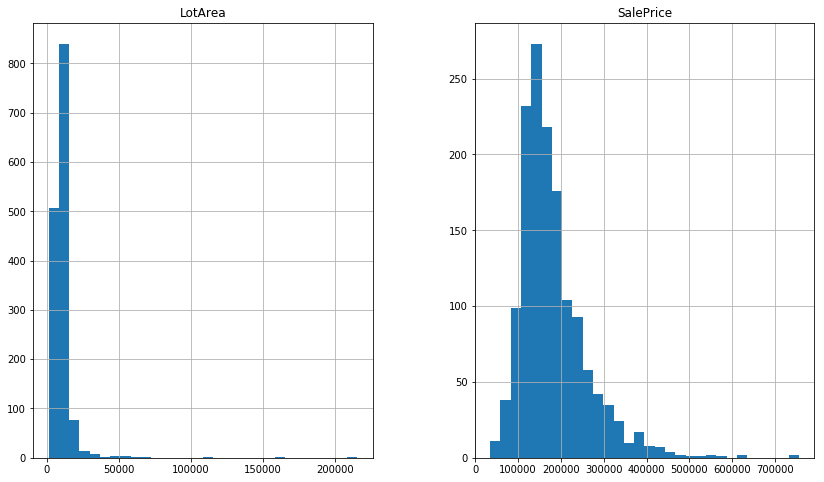

In [60]:
df_plots1.hist(figsize=(14,8), bins=30);

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


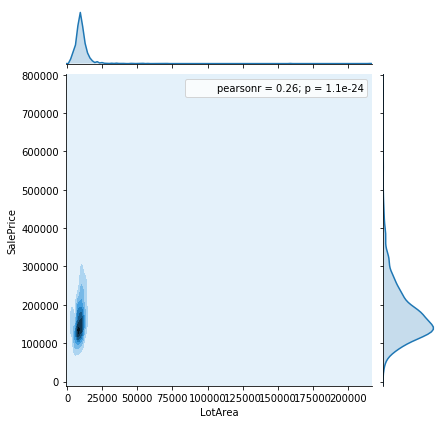

In [61]:
sns.jointplot(df_plots1['LotArea'], df_plots1['SalePrice'], kind='kde');

In [62]:
df_plots2 = df_t1[['OverallQual','SalePrice']]

In [63]:
df_plots2.corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde088f8940>,
      dtype=object)

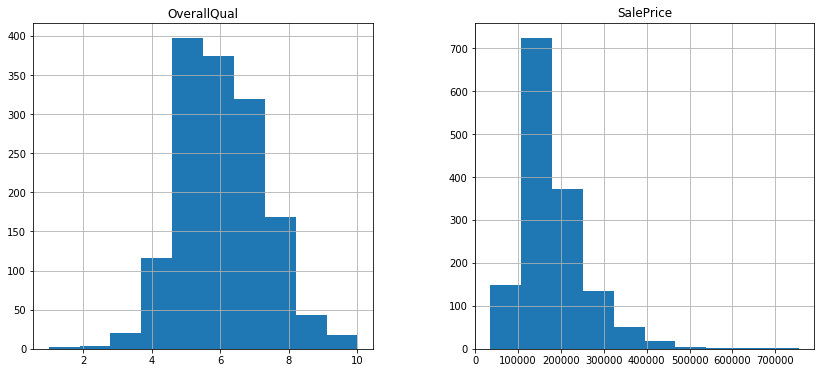

In [64]:
df_plots2.hist(figsize=(14,6))

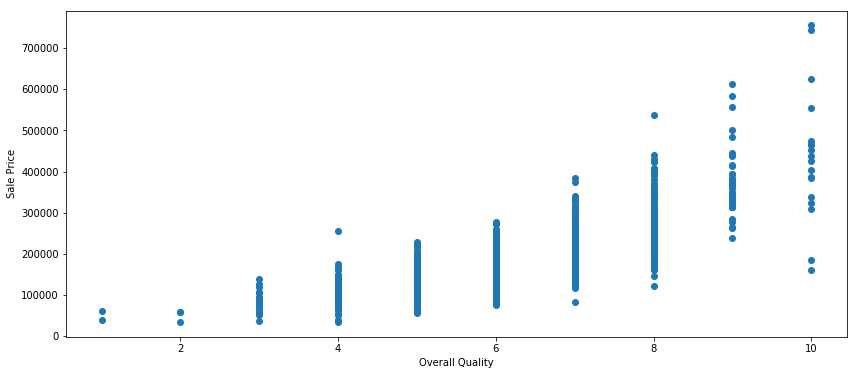

In [65]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots2['OverallQual'], df_plots2['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


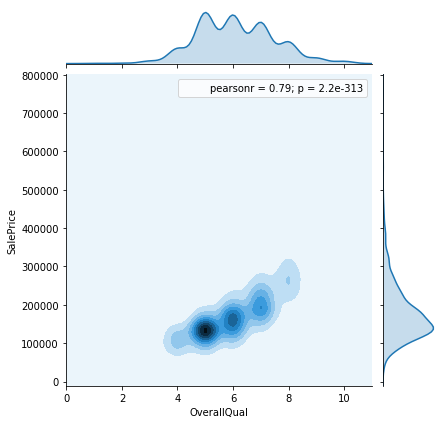

In [66]:
sns.jointplot(df_plots2['OverallQual'], df_plots2['SalePrice'], kind='kde')

In [67]:
df_plots3 = df_t1[['OverallCond', 'SalePrice']]

In [68]:
df_plots3.corr()

,OverallCond,SalePrice
OverallCond,1.000000,-0.077856
SalePrice,-0.077856,1.000000


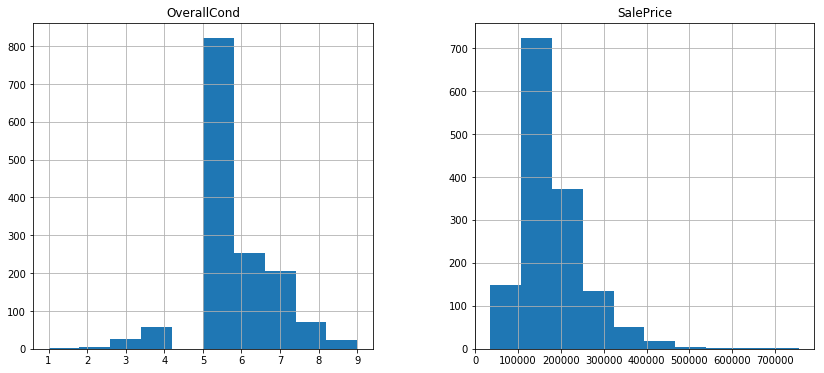

In [69]:
df_plots3.hist(figsize=(14,6));

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


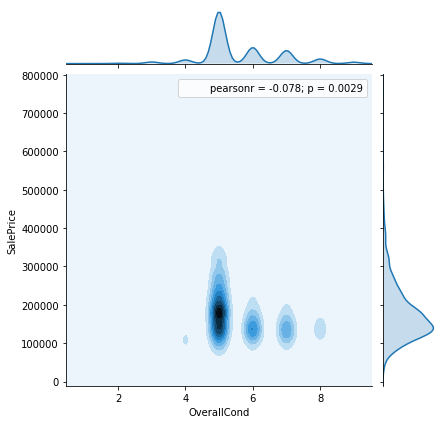

In [70]:
sns.jointplot(df_plots3['OverallCond'],df_plots3['SalePrice'], kind='kde');

In [71]:
df_plots4 = df_t1[['YrSold', 'SalePrice']]

In [72]:
df_plots4.corr()

,YrSold,SalePrice
YrSold,1.000000,-0.028923
SalePrice,-0.028923,1.000000


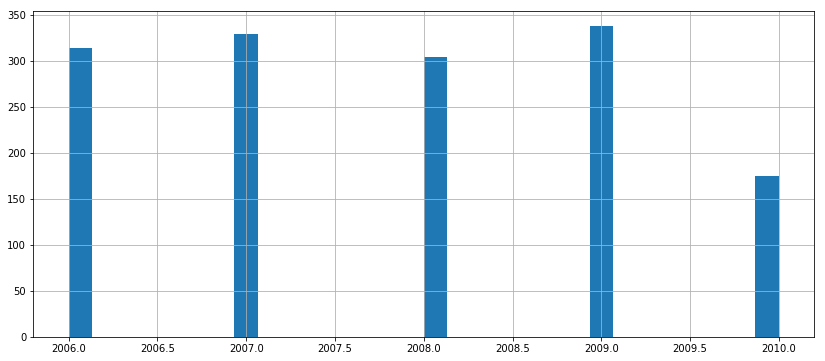

In [73]:
df_plots4['YrSold'].hist(figsize=(14,6), bins=30);

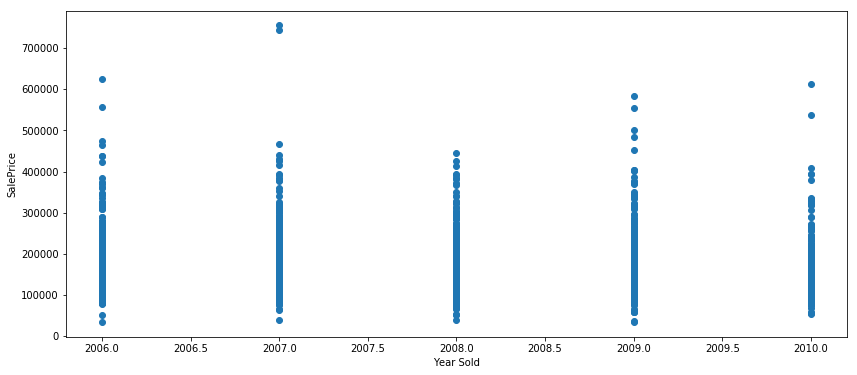

In [74]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots4['YrSold'], df_plots4['SalePrice'])
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


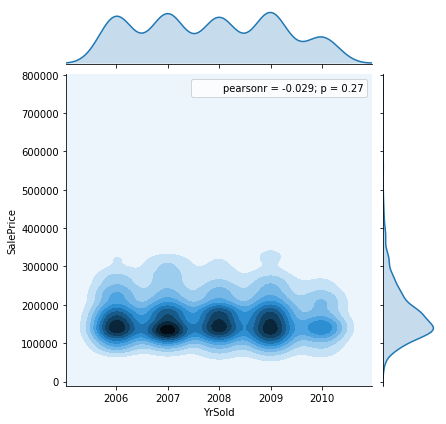

In [75]:
sns.jointplot(df_plots4['YrSold'], df_plots4['SalePrice'], kind='kde');

In [76]:
def neighborhood(name):
    if name == 'Blmngtn':
        return 1
    elif name == 'Blueste':
        return 2
    elif name == 'BrDale':
        return 3
    elif name == 'BrkSide':
        return 4
    elif name == 'ClearCr':
        return 5
    elif name == 'CollgCr':
        return 6
    elif name == 'Crawfor':
        return 7
    elif name == 'Edwards':
        return 8
    elif name == 'Gilbert':
        return 9
    elif name == 'IDOTRR':
        return 10
    elif name == 'MeadowV':
        return 11
    elif name == 'Mitchel':
        return 12
    elif name == 'NAmes':
        return 13
    elif name == 'NoRidge':
        return 14
    elif name == 'NPkVill':
        return 15
    elif name == 'NridgHt':
        return 16
    elif name == 'NWAmes':
        return 17
    elif name == 'OldTown':
        return 18
    elif name == 'SWISU':
        return 19
    elif name == 'Sawyer':
        return 20
    elif name == 'SawyerW':
        return 21
    elif name == 'Somerst':
        return 22
    elif name == 'StoneBr':
        return 23
    elif name == 'Timber':
        return 24
    elif name == 'Veenker':
        return 25
    else:
        return 0
    
    
    
neighborhood('OldTown')


18

In [77]:
df_t1['Neighborhoods'] = df_t1['Neighborhood'].apply(neighborhood)


In [78]:
df_plots5 = df_t1[['Neighborhoods','SalePrice']]
df_plots5.corr()

,Neighborhoods,SalePrice
Neighborhoods,1.000000,0.178883
SalePrice,0.178883,1.000000


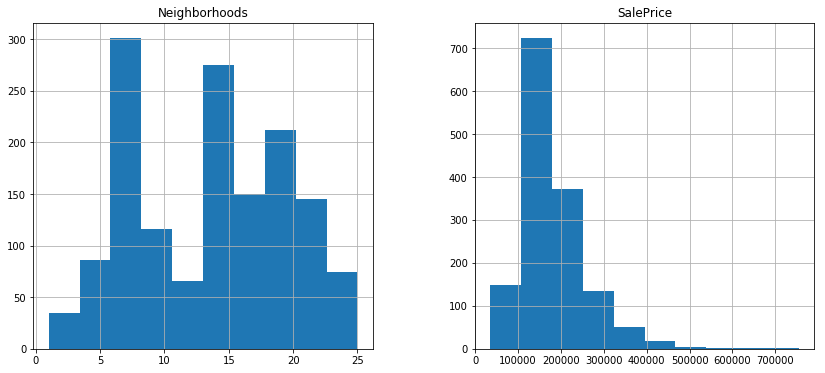

In [79]:
df_plots5.hist(figsize=(14,6));

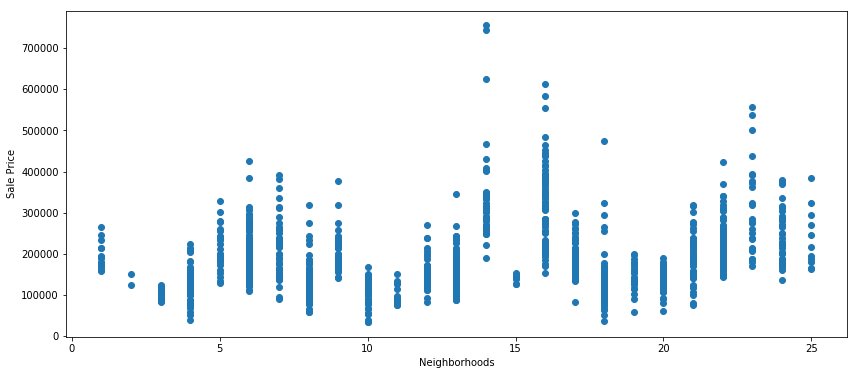

In [80]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots5['Neighborhoods'], df_plots5['SalePrice'])
plt.xlabel('Neighborhoods')
plt.ylabel('Sale Price')
plt.show()

In [81]:
(df_plots5['Neighborhoods'] == 0).sum()

0

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


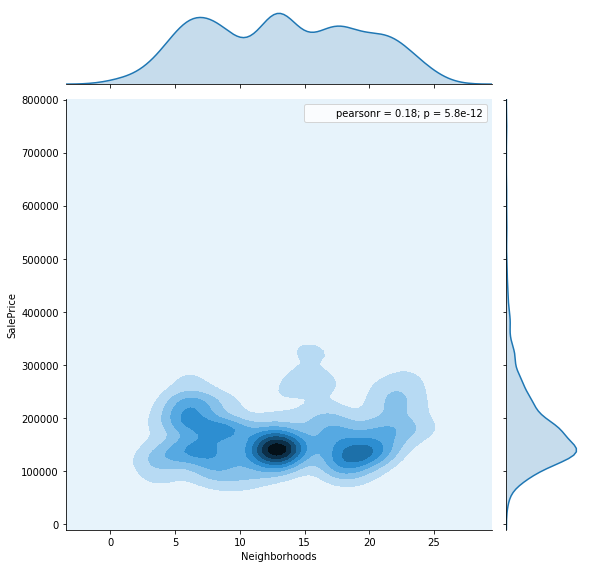

In [82]:
sns.jointplot(df_plots5['Neighborhoods'], df_plots5['SalePrice'],kind = 'kde', size = 8)

In [83]:
def zona(zoning):
    if zoning == 'A':
        return 1
    elif zoning == 'C':
        return 2
    elif zoning == 'FV':
        return 3
    elif zoning == 'I':
        return 4
    elif zoning == 'RH':
        return 5
    elif zoning == 'RL':
        return 6
    elif zoning == 'RP':
        return 7
    elif zoning == 'RM':
        return 8
    elif zoning == 'C (all)':
        return 9
    else:
        return 0
    
zona('C (all)')

9

In [84]:
df_t1['MSZonings'] = df_t1['MSZoning'].apply(zona)

In [85]:
df_plots6 = df_t1[['MSZonings','SalePrice']]

In [86]:
(df_plots6['MSZonings'] == 0).sum()

0

In [87]:
df_plots6.corr()

,MSZonings,SalePrice
MSZonings,1.000000,-0.276228
SalePrice,-0.276228,1.000000


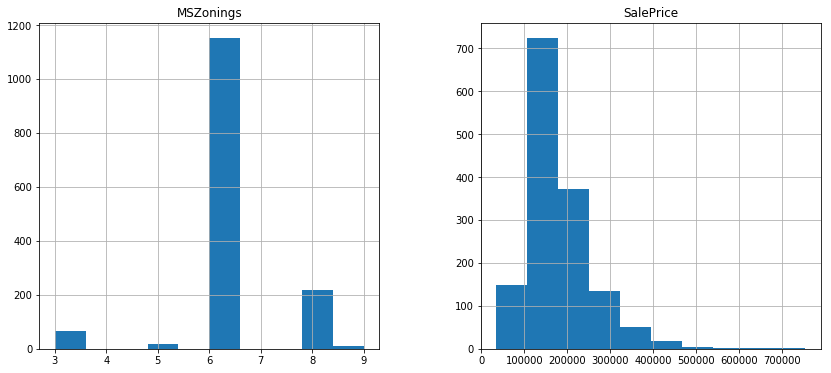

In [88]:
df_plots6.hist(figsize=(14,6));

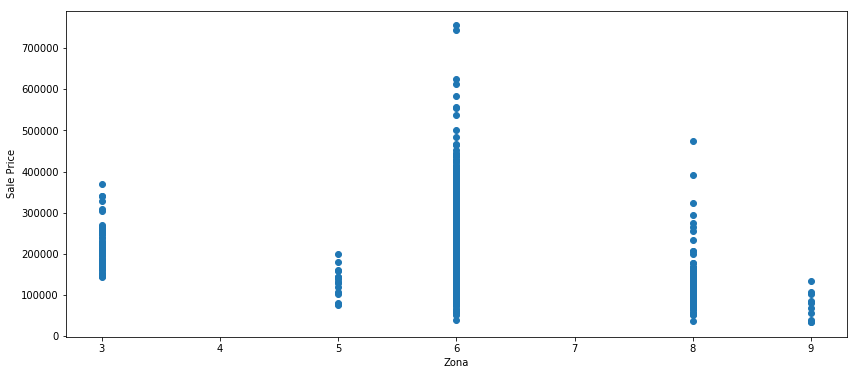

In [89]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots6['MSZonings'], df_plots6['SalePrice'])
plt.xlabel('Zona')
plt.ylabel('Sale Price')
plt.show()

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


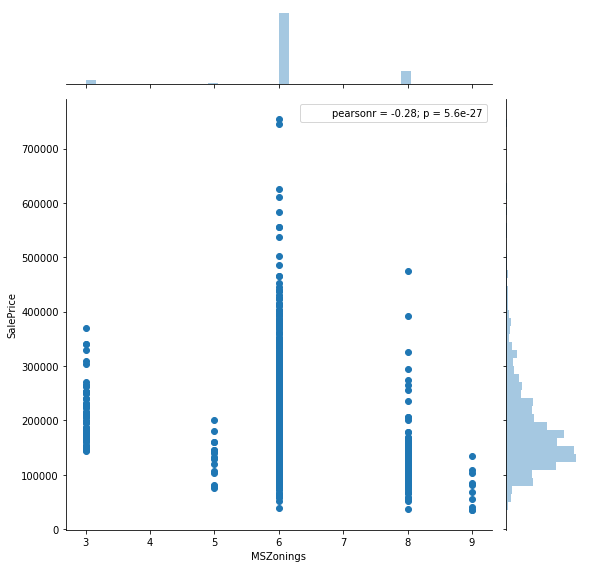

In [90]:
sns.jointplot(df_plots6['MSZonings'],df_plots6['SalePrice'], kind = 'scatter', size=8);

In [91]:
df_plots7 = df_t1[['TotalBsmtSF', 'SalePrice']]

In [92]:
df_plots7.describe()

,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000
mean,1057.429452,180921.195890
std,438.705324,79442.502883
min,0.000000,34900.000000
25%,795.750000,129975.000000
50%,991.500000,163000.000000
75%,1298.250000,214000.000000
max,6110.000000,755000.000000


In [93]:
df_plots7.corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


In [94]:
(df_plots7['TotalBsmtSF'] == 0).sum()

37

In [95]:
(df_plots7['TotalBsmtSF']).mean()

1057.4294520547944

In [96]:
df_plots7['TotalBsmtSF'] = (df_plots7['TotalBsmtSF']).replace(0, 1057)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


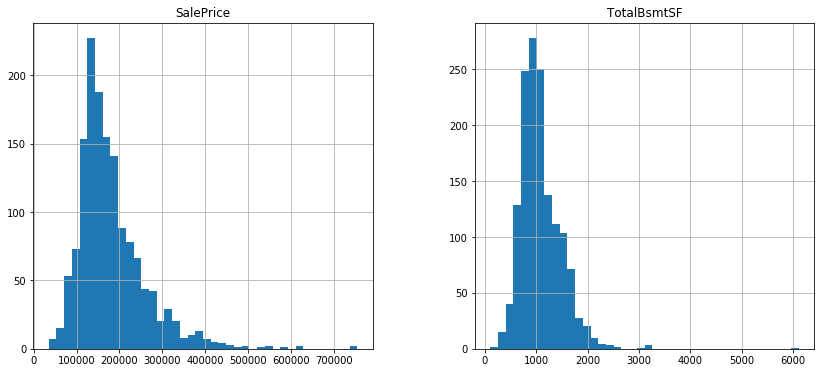

In [97]:
df_plots7.hist(figsize=(14,6), bins=40);

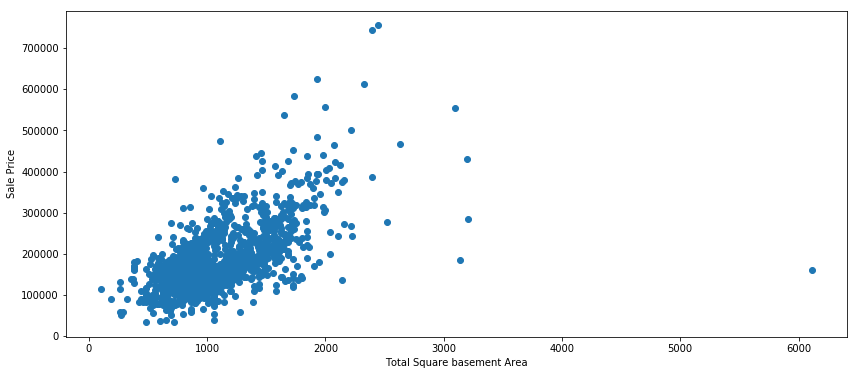

In [98]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots7['TotalBsmtSF'], df_plots7['SalePrice'])
plt.xlabel('Total Square basement Area')
plt.ylabel('Sale Price')
plt.show()

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


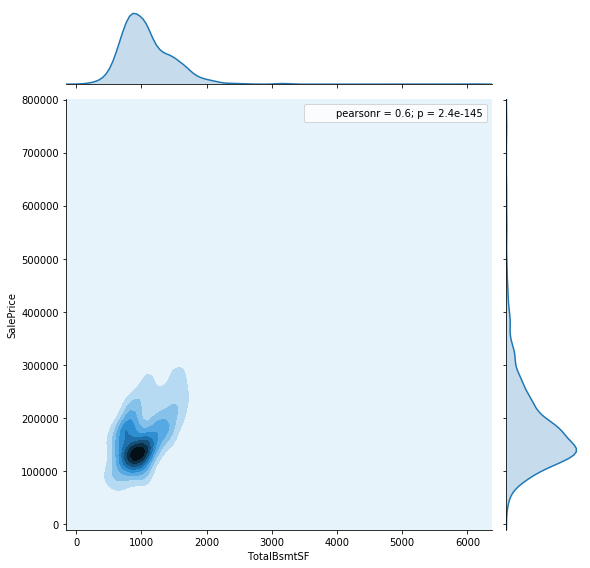

In [99]:
sns.jointplot(df_plots7['TotalBsmtSF'], df_plots7['SalePrice'], kind='kde', size=8)

In [100]:
print((df_t1['HeatingQC'] == 'Ex').sum())
print((df_t1['HeatingQC'] == 'Gd').sum())
print((df_t1['HeatingQC'] == 'TA').sum())
print((df_t1['HeatingQC'] == 'Fa').sum())
print((df_t1['HeatingQC'] == 'Po').sum())

741
241
428
49
1


In [101]:
def heating(level):
    if level == 'Ex':
        return 1
    elif level == 'Gd':
        return 2
    elif level == 'TA':
        return 3
    elif level == 'Fa':
        return 4
    elif level == 'Po':
        return 5
    else:
        return 0
    
heating('Exa')
    

0

In [102]:
df_t1['HeatingsQC'] = df_t1['HeatingQC'].apply(heating)

In [103]:
df_plots8 = df_t1[['HeatingsQC', 'SalePrice']]

In [104]:
df_plots8.corr()

,HeatingsQC,SalePrice
HeatingsQC,1.000000,-0.427649
SalePrice,-0.427649,1.000000


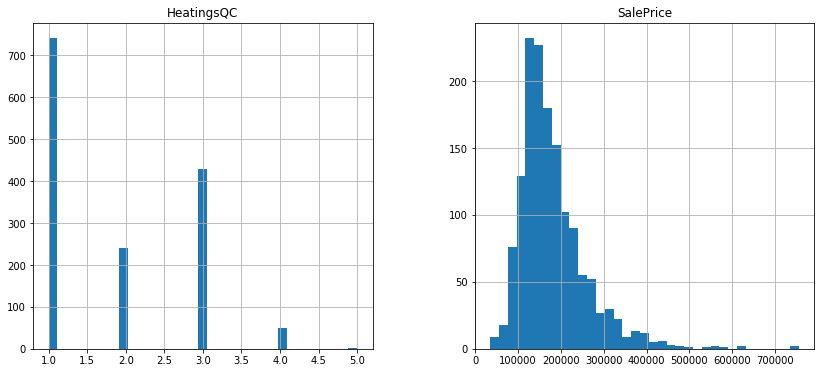

In [105]:
df_plots8.hist(figsize=(14,6), bins=35);

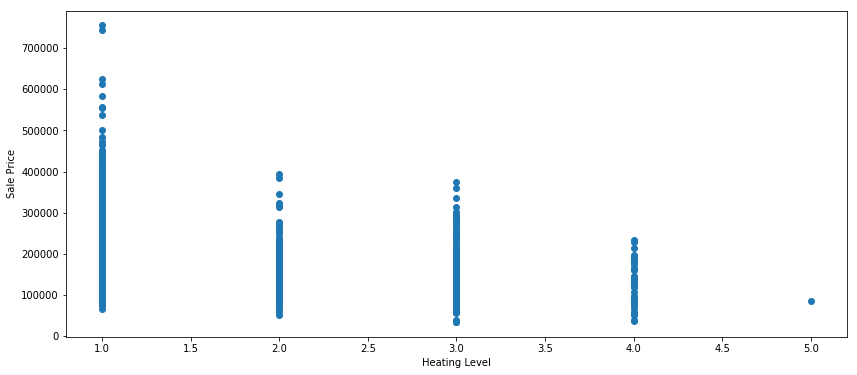

In [106]:
plt.figure(figsize=(14,6))
plt.scatter(df_plots8['HeatingsQC'], df_plots8['SalePrice'])
plt.xlabel('Heating Level')
plt.ylabel('Sale Price')
plt.show()

/home/vant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


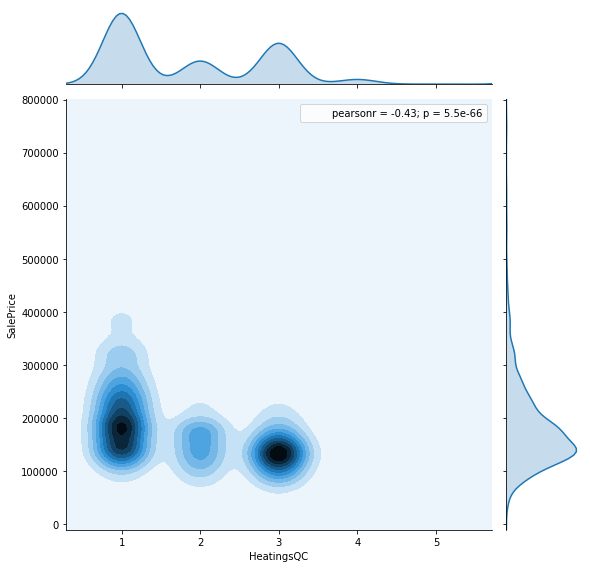

In [107]:
sns.jointplot(df_plots8['HeatingsQC'], df_plots8['SalePrice'],kind='kde', size=8)

In [108]:
df_plots8.head()

,HeatingsQC,SalePrice
0,1,208500
1,1,181500
2,1,223500
3,2,140000
4,1,250000


In [109]:
df_good = df_t1[['Neighborhoods', 'HeatingsQC', 'MSZonings', 'Foundations', 'Electricals', 'CentralAirs', 
                'SaleTypes', 'GarageTypes']]

In [110]:
df_good.reset_index(level=0, inplace=True)

In [111]:
df_good.head()

,index,Neighborhoods,HeatingsQC,MSZonings,Foundations,Electricals,CentralAirs,SaleTypes,GarageTypes
0,0,6,1,6,3,1,1,1,2
1,1,25,1,6,2,1,1,1,2
2,2,6,1,6,3,1,1,1,2
3,3,7,2,6,1,1,1,1,6
4,4,14,1,6,3,1,1,1,2


In [112]:
df_faq2.reset_index(level=0, inplace=True)

In [113]:
df_faq2.head()

,index,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [114]:
df_good_one = pd.merge(df_faq2, df_good, how='inner', on='index')

In [115]:
df_good_one.shape

(1460, 27)

In [116]:
df_good_one.head()

,index,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Neighborhoods,HeatingsQC,MSZonings,Foundations,Electricals,CentralAirs,SaleTypes,GarageTypes
0,0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500,6,1,6,3,1,1,1,2
1,1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500,25,1,6,2,1,1,1,2
2,2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500,6,1,6,3,1,1,1,2
3,3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000,7,2,6,1,1,1,1,6
4,4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000,14,1,6,3,1,1,1,2


In [117]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor as knnr
import seaborn as sns
sns.set_style("whitegrid")
import os
import pickle

/home/vant/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [123]:
X_pred = df_good_one.drop(['SalePrice','index'], axis=1).values

In [127]:
scale = StandardScaler()

In [128]:
X_pred1 = scale.fit_transform(X_pred)

In [121]:
X_train = X_pred[0:1168]
X_test = X_pred[1168:1460]

In [129]:
y_pred = df_good_one[['SalePrice']].values

In [130]:
y_pred1 = scale.fit_transform(y_pred)

/home/vant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [121]:
Y_train = y_pred[0:1168]
Y_test = y_pred[1168:1460]

In [122]:
X_traine = np.array(X_train)
X_teste = np.array(X_test)
Y_traine = np.array(Y_train)
Y_teste = np.array(Y_test)

In [131]:
X_traine, X_teste, Y_traine, Y_teste = train_test_split(X_pred1, y_pred1, test_size=0.20) 

In [152]:
lmodel = LinearRegression(n_jobs=1,normalize=True)
lmodel.fit(X_traine,Y_traine)
y_predict = lmodel.predict(X_teste)

In [153]:
print(mean_squared_error(Y_teste, y_predict))

0.22428492155206556


In [154]:
print(r2_score(Y_teste, y_predict))

0.7700808159012834


In [138]:
k_model = knnr(n_neighbors=6)
k_model.fit(X_traine,Y_traine)
y_predict = k_model.predict(X_teste)

In [139]:
print(mean_squared_error(Y_teste, y_predict))

0.2643411215645397


In [140]:
print(r2_score(Y_teste, y_predict))

0.7290183639039247


In [143]:
d_model = dtr(max_depth=11, random_state=48)
d_model.fit(X_traine,Y_traine)
y_predict = d_model.predict(X_teste)

In [144]:
print(mean_squared_error(Y_teste, y_predict))

0.22363551198445727


In [145]:
print(r2_score(Y_teste, y_predict))

0.7707465392896287


In [148]:
rmodel=RandomForestRegressor(n_estimators=12,max_depth=11, random_state=64)
rmodel.fit(X_traine, Y_traine)
y_predict = rmodel.predict(X_teste)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [149]:
print(mean_squared_error(Y_teste, y_predict))

0.22170936634284819


In [150]:
print(r2_score(Y_teste, y_predict))

0.7727210716447663


In [155]:
rss=((Y_teste-y_predict)**2).sum()
mse=np.mean((Y_teste-y_predict)**2)
print("Final rmse value is =",np.sqrt(np.mean((Y_teste-y_predict)**2)))

Final rmse value is = 0.47358729031939356


In [156]:
rss = ((Y_teste-y_predict)**2).sum()
mse = np.square((Y_teste-y_predict)).mean()
print(rss)
print(mse)

65.49119709320314
0.22428492155206556


In [157]:
from math import sqrt

mse = mean_squared_error(Y_teste, y_predict)
print(mse)

0.22428492155206556


In [158]:
list(enumerate(rmodel.feature_importances_))

[(0, 0.590048335678618),
 (1, 0.011257896838350656),
 (2, 0.00965631617178533),
 (3, 0.010082899653796482),
 (4, 0.03026279977068441),
 (5, 0.05484621648614837),
 (6, 0.03365371355995323),
 (7, 0.04329131554393283),
 (8, 0.09670818251137185),
 (9, 0.017829670889756986),
 (10, 0.006693267756990289),
 (11, 0.008723465245676259),
 (12, 0.00603519537569262),
 (13, 0.020503452908936806),
 (14, 0.02091367372676974),
 (15, 0.006535127920836617),
 (16, 0.006755178849632321),
 (17, 0.008668581947958017),
 (18, 0.0015714401966367825),
 (19, 0.003680475658463342),
 (20, 0.00094937544809485),
 (21, 0.00023459983009664067),
 (22, 0.005944209080980832),
 (23, 0.0017657469247490804),
 (24, 0.0033888620240875903)]

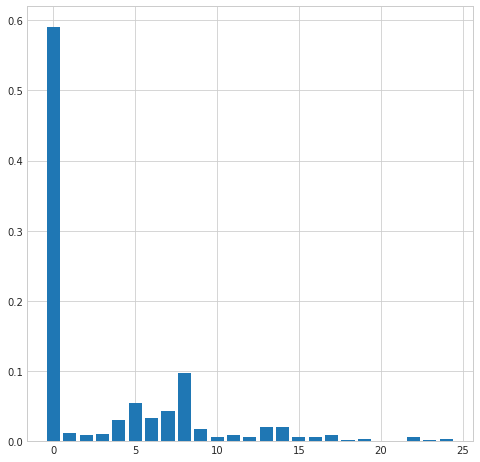

In [159]:
fig = plt.figure(figsize=(8, 8))
plt.bar(range(len(rmodel.feature_importances_)), rmodel.feature_importances_)
plt.show()